In [1]:
import numpy as np
import matplotlib.pyplot as plt
from models.vibrating_string import Vibrating_string
from models.diffusion_equation import SimulationGrid
from models.methods import gauss_seidel, sor, jacobi

# Set 1

## 1.1 Vibrating string

### A: Discretization

A. (0.5 point) Discretize the wave equation, and write it in a form suitable for
implementing in a computer program. Assume that the boundaries are fixed, Ψ(x =
0, t) = 0, Ψ(x = L, t) = 0. L is the length of the string. Take L = 1 for simplicity.
Divide the string in N intervals, so that the interval length is ∆x = L/N . Also
consider the boundary cases.

### B: Plots

B. (1 point) Implement the time stepping. Determine the time development of
the string, with the following initial conditions. The string is at rest at t = 0, i.e.
Ψ′(x, t = 0) = 0.
i. Ψ(x, t = 0) = sin(2πx).
ii. Ψ(x, t = 0) = sin(5πx).
iii. Ψ(x, t = 0) = sin(5πx) if 1/5 < x < 2/5, else Ψ = 0.
Take c = 1 and use the time step ∆t = 0.001. Plot the result at several times in
the same ﬁgure, e.g. varying the color of the curve

In [2]:
def plotter(ax,string,time_plot = [0.0,1.25,2.5,4.3,7.2,10]):
    """
    Does the stepping scheme over time and plots every "step_plot"
    Inputs:
        -   step_plot: How many iterations between plots, 100 by default
    """

    for time_step in range(string.n_steps):

        if time_step*string.tao in time_plot:
            ax.plot(string.x,string.data[time_step], label = f"Time = {string.tao*time_step}")
    ax.legend()
    ax.set_xlabel("x")
    ax.set_ylabel("Amplitude")

#### $sin(5 \cdot \pi \cdot x)$ if $1/5 <x<2/5$

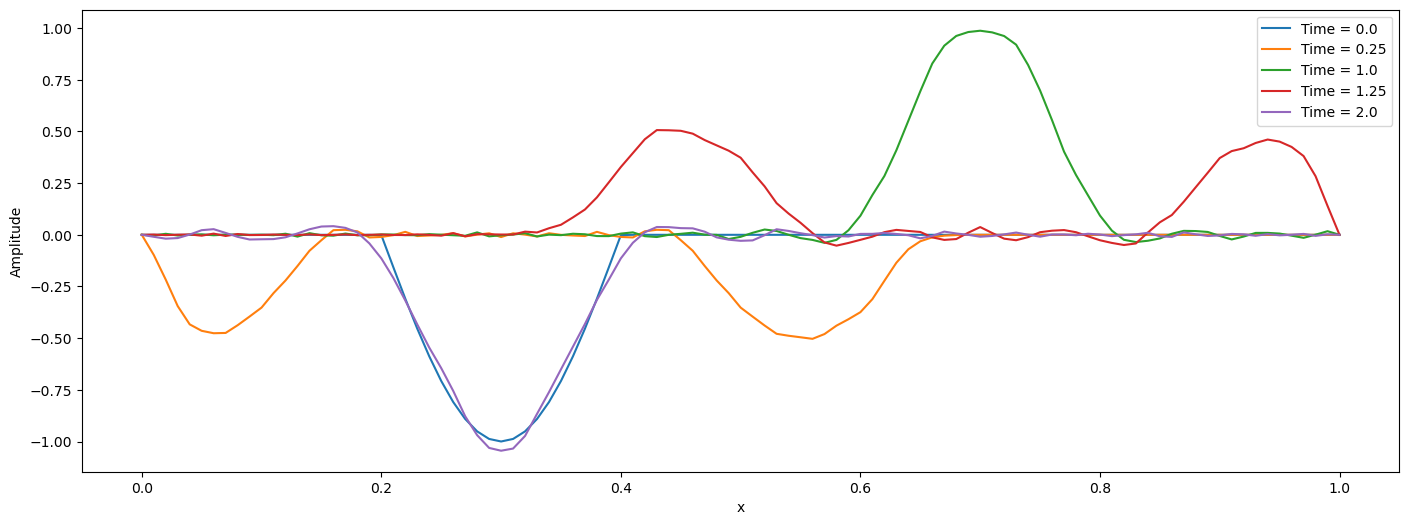

In [3]:
fig,axs = plt.subplots(1,1, figsize = (17,6))
string = Vibrating_string(mode = 3,N = 100,T = 10)
plotter(axs,string, time_plot = [0.0,0.25,1.,1.25,2])

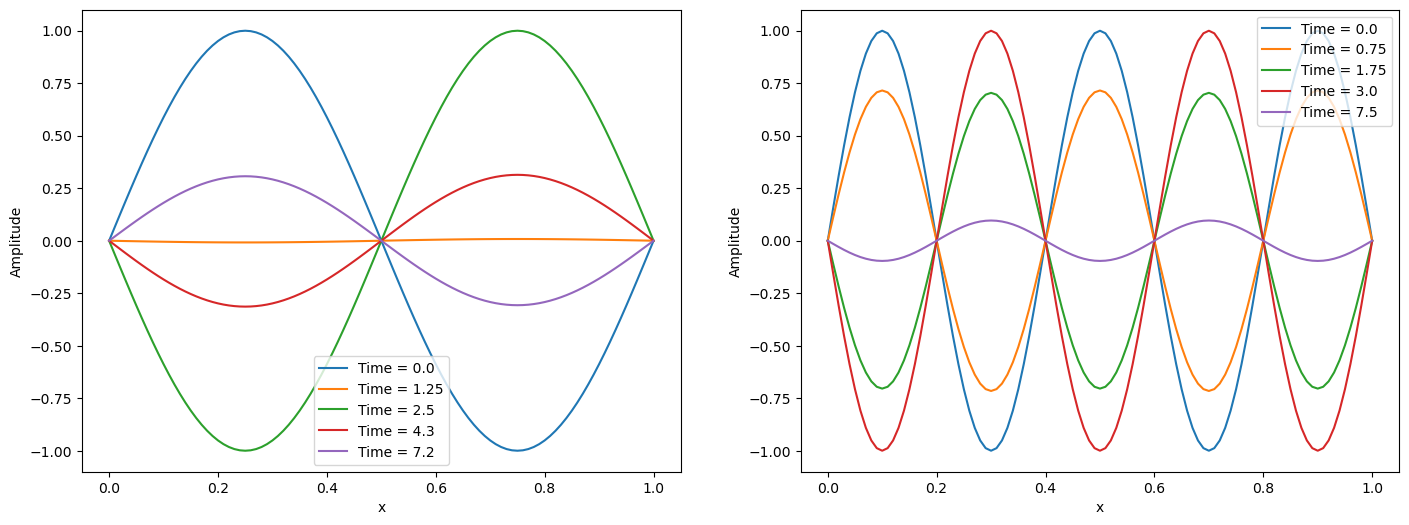

In [4]:
fig,axs = plt.subplots(1,2, figsize = (17,6))


string = Vibrating_string(mode = 1,N = 100,T = 10)
plotter(axs[0],string)

string = Vibrating_string(mode = 2,N = 100,T = 10)
plotter(axs[1],string, time_plot = [0.0,0.75,1.75,3.0,7.5])



## 1.2. The Time Dependent Diffusion Equation

### D

D. (0.5 point) Determine the equation to use at the boundaries of the domain.
Clearly show the ranges of the indices of the grid. A ﬁgure is extremely helpful for
ﬁguring this out

------

### E


E. (1 point) Test the correctness of your simulation. Compare to the analytic
solutions, plot c(y) for diﬀerent times. The analytic solution i

In [5]:
dif = SimulationGrid(50)

In [6]:
time_show = [0.001, 0.01, 0.1, 1] 
dif.time_dependent(t = 1,time_list = time_show)

0.001
0.01
0.1


[]


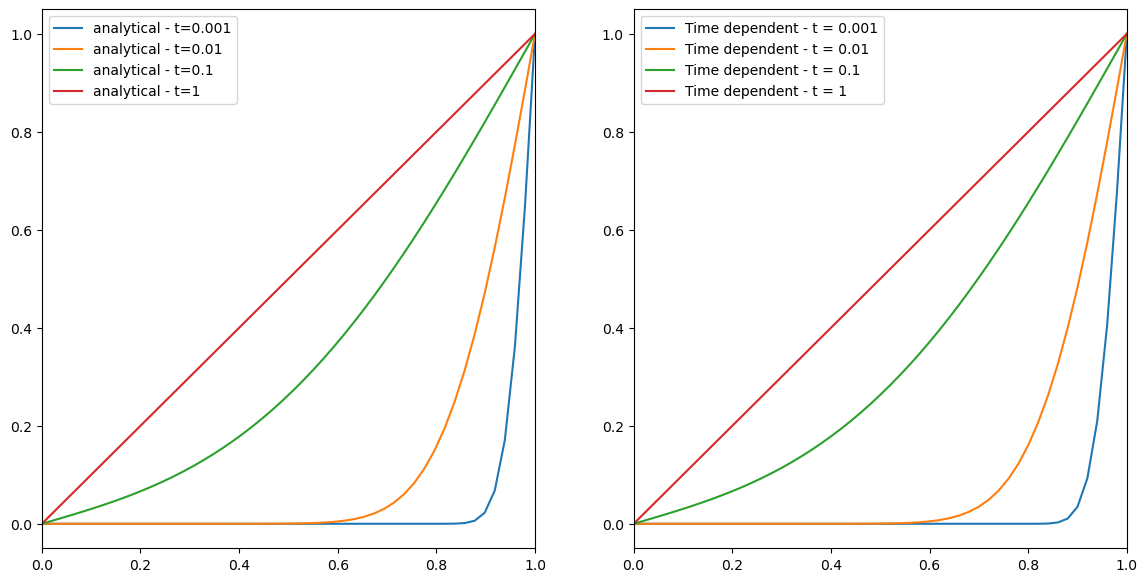

In [7]:
fig,axs = plt.subplots(1,2, figsize =(14,7))
errors = []

for t in time_show:
    result = dif.c_analytical(t)
    text = f"analytical - t={t}"
    axs[0].plot(np.linspace(0,1,num= len(result)),result,label=text)
    

for t,d in enumerate(dif.data_especial):
    text = f"Time dependent - t = {time_show[t]}"
    axs[1].plot(np.linspace(0,1,num= len(d[::-1,1])),d[::-1,1],label=text)
    
axs[0].set_xlim(0,1)
axs[1].set_xlim(0,1)
axs[0].legend()
axs[1].legend()
print(errors)
plt.show()


### F

F. (1 point) Plot the results, show the 2D domain, with a color representing the
concentration at each point. Make a plot of the state of the system at several times:
t = {0, 0.001, 0.01, 0.1, and 1}.

In [8]:
test = SimulationGrid(50)
time_show = [0.001, 0.01, 0.1, 1] 
dif.time_dependent(t = 1,time_list = time_show)

0.001
0.01
0.1


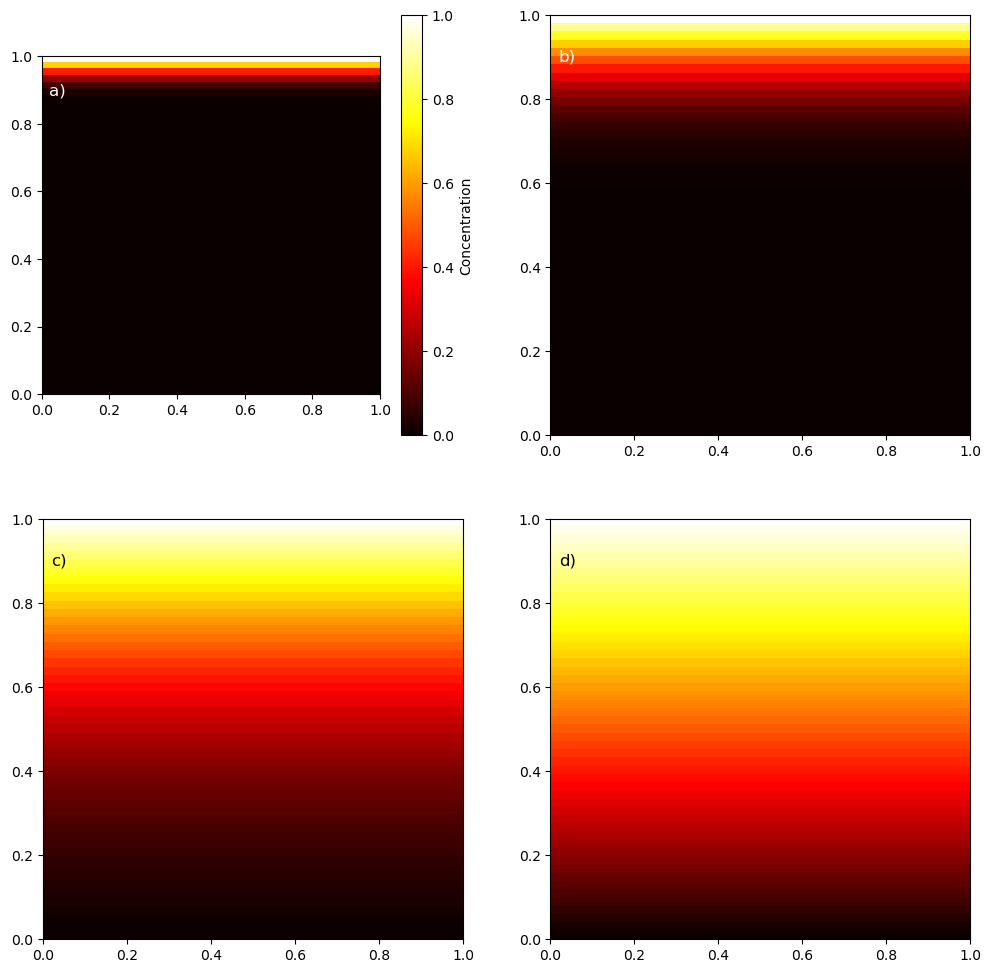

In [9]:
fig,axs = plt.subplots(2,2,figsize = (12,12))
axs = axs.flatten()
labels = ["a","b","c","d"]

for t,d in enumerate(dif.data_especial):
    if t<4:
        img = axs[t].imshow(d, cmap='hot', interpolation='nearest', extent=[0, 1, 0, 1])
        if t <2:
            axs[t].text(0.02, 0.92, labels[t] + ')', transform=axs[t].transAxes,
                        fontsize=12, verticalalignment='top', color='white')
        if t>=2:
            axs[t].text(0.02, 0.92, labels[t] + ')', transform=axs[t].transAxes,
                fontsize=12, verticalalignment='top', color='black')
        if t == 0:
            cbar = plt.colorbar(img, ax=axs[t])
            cbar.set_label('Concentration')


### G

1 point) Make an animated plot of the time dependent diﬀusion equation until
equilibrium

### H

(1 point) Implement the Jacobi iteration, the Gauss-Seidel method and SOR.
Try N = 50. Test the methods by comparing the result to the analytical result in
eq. (5), i.e. the linear dependence of the concentration on y

In [3]:
N = 50
dif = SimulationGrid(50)

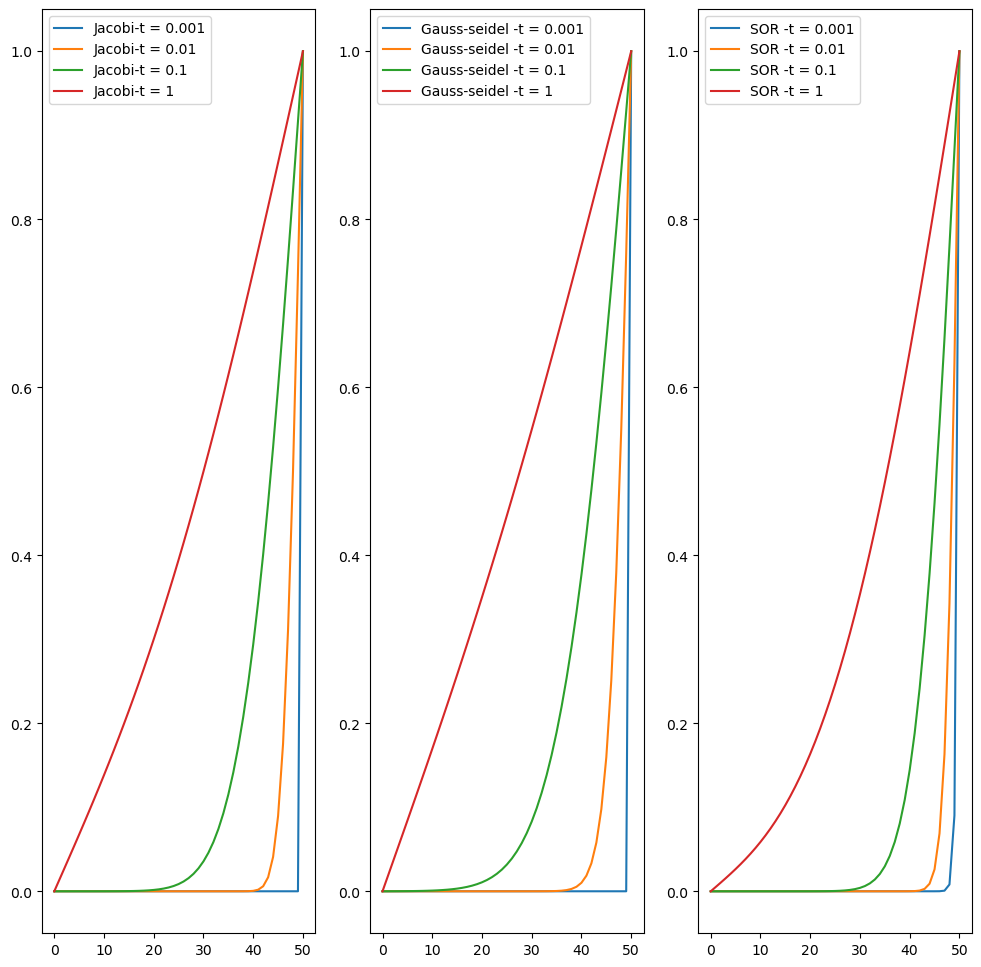

In [11]:
N = 50
dif = SimulationGrid(50)
fig,axs = plt.subplots(1,3, figsize = (12,12))
axs = axs.flatten()
y_input = np.linspace(0,1,50)
time_show = [0.001, 0.01, 0.1, 1] 

dif.time_independent(jacobi,stop = 0.0001)

shape = len(dif.data)
positions = [int(shape*0.01) -1,int(shape*0.1) -1,int(shape*0.1)-1,shape-1]
data = dif.data[int(shape*0.001) -1], dif.data[int(shape*0.01) -1], dif.data[int(shape*0.1)-1],dif.data[shape-1]

for i,d in enumerate(data):
    text = f"Jacobi-t = {time_show[i]}"
    axs[0].plot(d[::-1,1], label = text)
axs[0].legend()
        


dif.time_independent(gauss_seidel, stop = 0.0001)
shape = len(dif.data)
positions = [int(shape*0.01) -1,int(shape*0.1) -1,int(shape*0.1)-1,shape-1]

data = dif.data[int(shape*0.001) -1], dif.data[int(shape*0.01) -1], dif.data[int(shape*0.1)-1],dif.data[shape-1]
for i,d in enumerate(data):
    text = f"Gauss-seidel -t = {time_show[i]}"
    axs[1].plot(d[::-1,1],label=text)
axs[1].legend()


dif.time_independent(sor,w =1/3, stop = 0.0001)
shape = len(dif.data)
positions = [int(shape*0.01) -1,int(shape*0.1) -1,int(shape*0.1)-1,shape-1]
data = dif.data[int(shape*0.001) -1], dif.data[int(shape*0.01) -1], dif.data[int(shape*0.1)-1],dif.data[shape-1]
for i,d in enumerate(data):
    text = f"SOR -t = {time_show[i]}"
    axs[2].plot(d[::-1,1],label=text)
axs[2].legend()
plt.show()

#### I

In [4]:
stop_criteria = np.linspace(0.01, 0.00001, num=20, endpoint=True)
print(stop_criteria)

iterations_jacobi= []
iterations_gauss= []
iterations_sor= []
for delta in stop_criteria:
        dif.time_independent(jacobi,stop = delta)
        iterations_jacobi.append(dif.iterations[-1])
        
        dif.time_independent(gauss_seidel,stop = delta)
        iterations_gauss.append(dif.iterations[-1])
        
        dif.time_independent(sor,w =1/3,stop = delta)
        iterations_sor.append(dif.iterations[-1])

[1.00000000e-02 9.47421053e-03 8.94842105e-03 8.42263158e-03
 7.89684211e-03 7.37105263e-03 6.84526316e-03 6.31947368e-03
 5.79368421e-03 5.26789474e-03 4.74210526e-03 4.21631579e-03
 3.69052632e-03 3.16473684e-03 2.63894737e-03 2.11315789e-03
 1.58736842e-03 1.06157895e-03 5.35789474e-04 1.00000000e-05]


Text(0.5, 0, 'Iterations k')

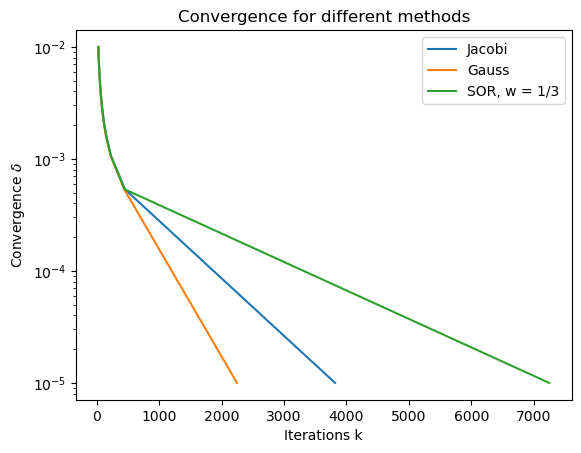

In [5]:
plt.plot(iterations_jacobi, stop_criteria, label = 'Jacobi')
plt.plot(iterations_gauss, stop_criteria, label = 'Gauss')
plt.plot(iterations_sor, stop_criteria, label = 'SOR, w = 1/3')
plt.legend()


plt.title('Convergence for different methods')
plt.yscale('log')
# plt.xscale('log')
plt.ylabel(r'Convergence $\delta$')
plt.xlabel('Iterations k')

#### Investigating different values of SOR

In [14]:
stop_criteria = np.linspace(0.01, 0.00001, num=20, endpoint=True)
ws  = [0.1, 0.5, 1, 1.5, 1.9]
results_gauss = []
for w_n in ws :
    print(w_n)
    iterations_sor = []
    for delta in stop_criteria:
        dif.time_independent(sor,w =w_n,stop = delta, store_step = 10000)
        iterations_sor.append(dif.iterations[-1])    
    results_gauss.append(iterations_sor)


0.1
0.5
1
1.5
1.9


Text(0.5, 0, 'Iterations k')

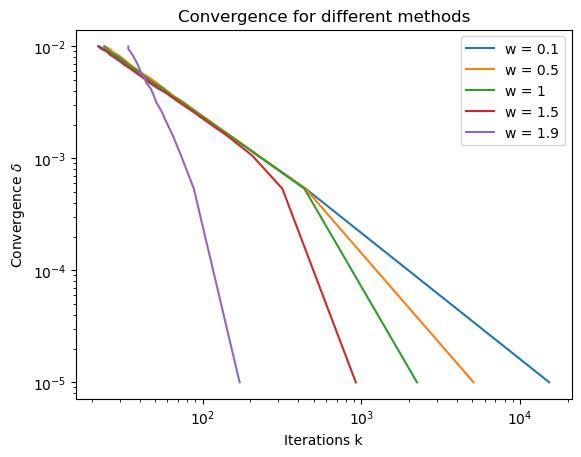

In [15]:
for k in range(len(ws)): 
    plt.plot(results_gauss[k], stop_criteria, label = f"w = {ws[k]}")


plt.legend()
# plt.plot(iterations_sor, stop_criteria, label = f"w = {w_n}")
plt.title('Convergence for different methods')
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'Convergence $\delta$')
plt.xlabel('Iterations k')

#### J


In [ ]:
def w_optimizer(Ns,ws, delta = 0.01):
    '''
    Creates a Simulation Grid of given size and calculates best w within range
    '''
    results = []
    for N in Ns:
        grid = SimulationGrid(N)
        max_iterations = float('inf')
        best_w = None
        for wx in ws:
            print(wx)
            grid.time_independent(sor,w =wx,stop = delta, store_step = 10000)
            iterations  = grid.iterations[-1]
            if iterations < max_iterations:
                max_iterations = iterations
#                 print(max_iterations)
                best_w = wx
#         print((N,best_w))
        results.append((N,best_w))
    return results    

In [17]:
dw = 0.005
ws = np.arange(1.71,1.99,dw)

dN= 10
Ns = np.arange(10,70+dN, dN)
print(Ns)

w_results = w_optimizer(Ns,ws, delta = 0.001)

[10 20 30 40 50 60 70]
1.71
1.7149999999999999
1.7199999999999998
1.7249999999999996
1.7299999999999995
1.7349999999999994
1.7399999999999993
1.7449999999999992
1.7499999999999991
1.754999999999999
1.759999999999999
1.7649999999999988
1.7699999999999987
1.7749999999999986
1.7799999999999985
1.7849999999999984
1.7899999999999983
1.7949999999999982
1.799999999999998
1.804999999999998
1.8099999999999978
1.8149999999999977
1.8199999999999976
1.8249999999999975
1.8299999999999974
1.8349999999999973
1.8399999999999972
1.844999999999997
1.849999999999997
1.8549999999999969
1.8599999999999968
1.8649999999999967
1.8699999999999966
1.8749999999999964
1.8799999999999963
1.8849999999999962
1.8899999999999961
1.894999999999996
1.899999999999996
1.9049999999999958
1.9099999999999957
1.9149999999999956
1.9199999999999955
1.9249999999999954
1.9299999999999953
1.9349999999999952
1.939999999999995
1.944999999999995
1.9499999999999948
1.9549999999999947
1.9599999999999946
1.9649999999999945
1.96999999999

Text(0, 0.5, '$\\omega_{{optimal}}$')

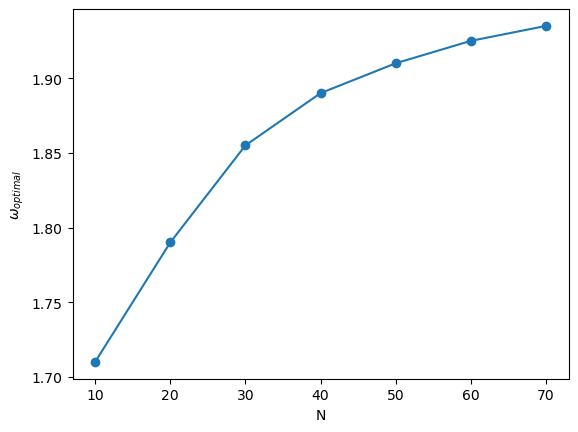

In [18]:
w_results = np.array(w_results)
plt.plot(w_results[:,0], w_results[:,1])
plt.scatter(w_results[:,0], w_results[:,1])
plt.xlabel('N')
plt.ylabel(r'$\omega_{{optimal}}$')

#### K


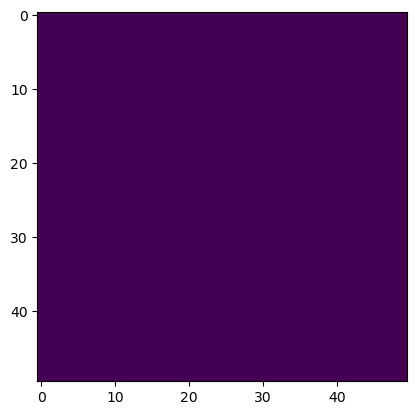

In [19]:
# sq1 = square(self, size, position)
N_reference = 50
test = np.zeros((N_reference,N_reference))
plt.imshow(test)

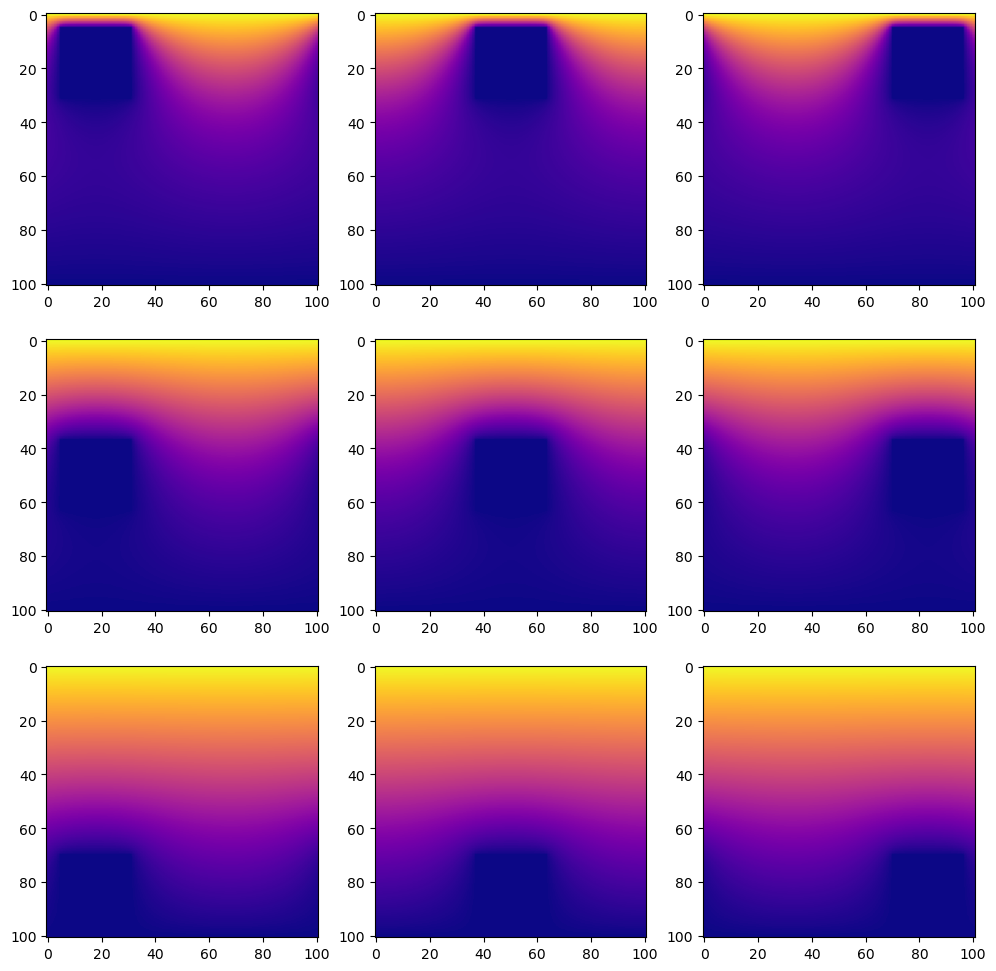

In [6]:
# Create a figure and three subplots arranged horizontally
fig, axs = plt.subplots(3, 3, figsize=(12, 12))


#26% size seems ideal, if not use 24%
gridboi = SimulationGrid(100)
indxs = [5, 5]
size = 27
gridboi.square(size, indxs)
gridboi.time_independent(sor,w =1.9,stop = 0.0001,store_step = 10000)
axs[0,0].imshow(gridboi.data[-1],cmap='plasma')


gridboi = SimulationGrid(100)
indxs = [5, 37]
size = 27
gridboi.square(size, indxs)
gridboi.time_independent(sor,w =1.9,stop = 0.0001,store_step = 10000)
axs[0,1].imshow(gridboi.data[-1],cmap='plasma')

gridboi = SimulationGrid(100)
indxs = [5, 100-5-25]
size = 27
gridboi.square(size, indxs)
gridboi.time_independent(sor,w =1.9,stop = 0.0001,store_step = 10000)
axs[0,2].imshow(gridboi.data[-1],cmap='plasma')

#SECOND ROW ================================================================
gridboi = SimulationGrid(100)
indxs = [37, 5]
size = 27
gridboi.square(size, indxs)
gridboi.time_independent(sor,w =1.9,stop = 0.0001,store_step = 10000)
axs[1,0].imshow(gridboi.data[-1],cmap='plasma')


gridboi = SimulationGrid(100)
indxs = [37, 37]
size = 27
gridboi.square(size, indxs)
gridboi.time_independent(sor,w =1.9,stop = 0.0001,store_step = 10000)
axs[1,1].imshow(gridboi.data[-1],cmap='plasma')

gridboi = SimulationGrid(100)
indxs = [37, 100-5-25]
size = 27
gridboi.square(size, indxs)
gridboi.time_independent(sor,w =1.9,stop = 0.0001,store_step = 10000)
axs[1,2].imshow(gridboi.data[-1],cmap='plasma')

#THIRD ROW ================================================================
gridboi = SimulationGrid(100)
indxs = [100-5-25, 5]
size = 27
gridboi.square(size, indxs)
gridboi.time_independent(sor,w =1.9,stop = 0.0001,store_step = 10000)
axs[2,0].imshow(gridboi.data[-1],cmap='plasma')


gridboi = SimulationGrid(100)
indxs = [100-5-25, 37]
size = 27
gridboi.square(size, indxs)
gridboi.time_independent(sor,w =1.9,stop = 0.0001,store_step = 10000)
axs[2,1].imshow(gridboi.data[-1],cmap='plasma')

gridboi = SimulationGrid(100)
indxs = [100-5-25, 100-5-25]
size = 27
gridboi.square(size, indxs)
gridboi.time_independent(sor,w =1.9,stop = 0.0001,store_step = 10000)
axs[2,2].imshow(gridboi.data[-1],cmap='plasma')

# Show the plot
plt.show()

##### Number of iterataions

In [21]:
# We keep track of iterations and position along axis 

N = 100
size = 20
y_range = [0,80]

indx_range =np.arange(y_range[0],y_range[1],5)

cube_centers = indx_range + (size/2)
# print(cube_centers)
print(indx_range)
print(cube_centers)

x_results = []
y_results = []

for k in range(len(indx_range)):
    indx = indx_range[k]
#     print(indx)
    #Results for x_axis
    gridboi = SimulationGrid(100)
    gridboi.square(size, [5, indx])
    gridboi.time_independent(sor,w =1.9,stop = 0.0001,store_step = 10000)
    iterations = gridboi.iterations[-1]
    x_results.append(iterations)
    
    #Results for x_axis
    gridboi = SimulationGrid(100)
    gridboi.square(size, [indx, 5])
    gridboi.time_independent(sor,w =1.9,stop = 0.0001,store_step = 10000)
    iterations = gridboi.iterations[-1]
    y_results.append(iterations)

x_results = np.array(x_results)
y_results = np.array(y_results)

[ 0  5 10 15 20 25 30 35 40 45 50 55 60 65 70 75]
[10. 15. 20. 25. 30. 35. 40. 45. 50. 55. 60. 65. 70. 75. 80. 85.]


In [22]:
gridboi = SimulationGrid(100)
gridboi.time_independent(sor,w =1.9,stop = 0.0001,store_step = 10000)

reference_iterations =gridboi.iterations[-1]
print(reference_iterations)

404


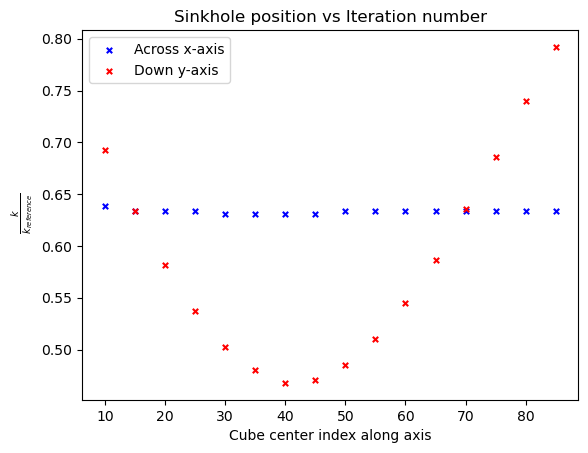

In [23]:
plt.scatter(cube_centers, x_results/reference_iterations, marker= 'x',label= 'Across x-axis', color='blue', s =15)
plt.scatter(cube_centers, y_results/reference_iterations, marker= 'x',label= 'Down y-axis', color= 'red', s=15)
plt.xlabel('Cube center index along axis')
plt.ylabel(r' $\frac{k}{k_{reference}}$')
# plt.ylabel(r'fraction of $k_{original}$')
plt.title('Sinkhole position vs Iteration number')
plt.legend()

#### Optimal w

In [24]:
def w_cube_optimizer(indxs,ws, size = 26,delta = 0.001, N=100):
    '''
    Creates a Simulation Grid of given size and calculates best w within range
    '''
    grid = SimulationGrid(N)
    grid.square(size, indxs)
    best_w = None
    max_iterations = float('inf')
    for wx in ws:
        grid.time_independent(sor,w =wx,stop = delta, store_step = 10000)
        iterations  = grid.iterations[-1]
        if iterations < max_iterations:
            max_iterations = iterations
            best_w = wx
    return best_w    

#### Checking position of cube against w

In [25]:
# print(np.arange(1.71,1.99,0.01))
test= SimulationGrid(50)
test.square(size=8,position =[40,22])
y_range = np.arange(0,40+5,5)

w_opt_cube = []
for yx in y_range:
    w_results = w_cube_optimizer(indxs= [yx,22], ws = np.arange(1.85,1.99,0.01), size = 8,delta = 0.001, N=50)
    w_opt_cube.append(w_results)
    
print(w_results)

1.9000000000000001


[1.8900000000000001, 1.87, 1.87, 1.87, 1.86, 1.86, 1.87, 1.8900000000000001, 1.9000000000000001]


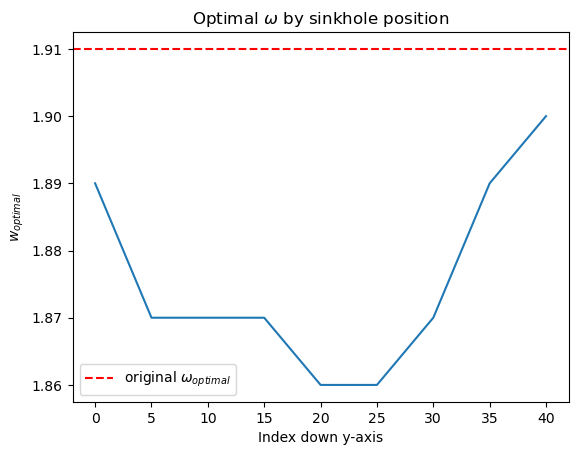

In [26]:
# w_opt_cube = np.arange(w_opt_cube)
reference_w = 1.91
print(w_opt_cube)
plt.plot(y_range, w_opt_cube)
plt.axhline(y=reference_w, color='r', linestyle='--',label=r'original $\omega_{optimal}$')
plt.xlabel('Index down y-axis')
plt.ylabel(r'$w_{optimal}$')
plt.title(r'Optimal $\omega$ by sinkhole position')
plt.legend(loc='lower left')



#### Checking for size of cube

In [28]:
print(np.arange(1.71,1.99,0.01))
test= SimulationGrid(50)
test.square(size=8,position =[40,22])
y_range = np.arange(0,40+5,5)
cube_sizes = np.arange(3,30)
w_opt_cube = []

for sizee in cube_sizes:
    w_results = w_cube_optimizer(indxs= [22, 22], ws = np.arange(1.85,1.99,0.01), size = sizee, delta = 0.001, N=50)
    w_opt_cube.append(w_results)
    
print(w_results)

[1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81 1.82 1.83 1.84
 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95 1.96 1.97 1.98
 1.99]
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\joann\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\joann\AppData\Local\Temp\ipykernel_22080\450790837.py", line 9, in <module>
    w_results = w_cube_optimizer(indxs= [22, 22], ws = np.arange(1.85,1.99,0.01), size = sizee, delta = 0.001, N=50)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\joann\AppData\Local\Temp\ipykernel_22080\2048898512.py", line 6, in w_cube_optimizer
    grid.square(size, indxs)
  File "c:\Users\joann\OneDrive\Escritorio\Intro\Scientific-Computing\Code\models\diffusion_equation.py", line 50, in square
Exception: Object does not fit

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\joann\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py

In [29]:
ws = np.arange(1.85,1.99,0.01)
indx_range =np.arange(0,44,5)
print(indx_range)
w_opt_cube = []

for indx in indx_range:
    w_results = w_cube_optimizer([indx,37],ws, size = 5, delta = 0.001)
    w_opt_cube.append(w_results[1])
    
    
# w_results = w_optimizer([100],ws, delta = 0.001)

    
print(w_opt_cube)

[ 0  5 10 15 20 25 30 35 40]


IndexError: invalid index to scalar variable.

In [ ]:
plt.plot(indx_range/100, w_opt_cube)

NameError: name 'w_opt_cube' is not defined

#### Checking size of cube

In [ ]:
ws = np.arange(1.9,2,0.01)
indx_range =np.arange(y_range[0],y_range[1],5)
w_opt_cube = []

cube_sizes = np.arange(3)

for sizee in sizes:
    w_results = w_cube_optimizer([37,37],size = sizee,ws, delta = 0.001)
    w_opt_cube.append(w_results[1])
    

In [ ]:
def w_optimizer(Ns, initial_w=1.0, learning_rate=0.01, max_iter=, delta=0.01, tol=50):
    '''
    Creates a Simulation Grid of given size and calculates best w within range
    '''
    results = []
    for N in Ns:
        print(N)
        prev_w = initial_w
        grid = SimulationGrid(N)
        for iter in range(max_iter):
            # Compute the gradient of the objective function with respect to w
 
            gradient = (sor(grid, prev_w + delta) - sor(N, prev_w - delta)) / (2 * delta)
            # Update w using gradient descent
            w = prev_w - learning_rate * gradient
            # Convergence criterion: stop if change in w is smaller than tolerance
            if abs(w - prev_w) < tol:
                break
            prev_w = w
        results.append((N, w))
    return results

def sor(grid, wx):
    # Placeholder for sor function implementation
    grid.time_independent(sor,w =wx, stop = 0.001, store_step = 10000)
    iterations = grid.iterations[-1]
    return iterations


In [ ]:
def w_optimizer(Ns, initial_w=1.85, learning_rate=0.01, max_iter=10, delta=0.01):
    '''
    Creates a Simulation Grid of given size and calculates best w within range
    '''
    results = []
    for N in Ns:
        print(N)
        best_w = initial_w  # Initialize w
        for _ in range(max_iter):
            # Compute the derivative of the objective function with respect to w
            gradient = (sor(N, best_w + delta) - sor(N, best_w - delta)) / (2 * delta)
            # Update w using gradient descent
            best_w -= learning_rate * gradient
        results.append((N, best_w))
    return results

# Assuming sor function is defined elsewhere
def sor(N, w):
    # Placeholder for sor function implementation
    return np.random.rand()

# Example usage
Ns = [10, 20, 30]
results = w_optimizer(Ns)
print(results)